# 합성곱 신경망(CNN)

## 1.1 Min-Max Normalization 데이터 정규화 작업

In [58]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [59]:
# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [60]:
# 데이터 갯수 확인하기
len(train_X), len(test_X), len(train_Y), len(test_Y)

(60000, 10000, 60000, 10000)

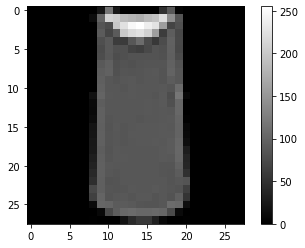

정답 범주:  0


In [61]:
# 이미지 확인하기
import matplotlib.pyplot as plt 
plt.imshow(train_X[2], cmap='gray')
plt.colorbar()
plt.show()

# 정답 범주 확인
print("정답 범주: ", train_Y[2])

In [62]:
# 데이터 정규화 이전의 이미지 픽셀 행렬

# print(train_X[2])

최소-최대 정규화(Min-Max Normalization)

- 데이터를 정규화하는 가장 일반적인 방법

- 모든 feature에 대해 각각의 최소값 0, 최대값 1

- 그리고 0과 1 사이의 값으로 변환


$$
\frac{(X - MIN)}{(MAX - MIN)} = \frac{X - 0}{(255 - 0)}
$$


In [63]:
# 최소-최대 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

In [64]:
# 확인하기

# train_X[2]

## 다층 퍼셉트론에서의 이미지 처리

원본 데이터가 28x28의 2차원 array

Flatten()은 다차원 이미지를 1차원으로 평평하게 바꿔주는 단순 레이어
- input_shape: 원본 데이터의 크기를 입력

Dense 레이어는 완전 연결 레이어

마지막 레이어의 units 값 10, 즉 정답 변수의 수와 동일


In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

컴파일 단계

- Adam의 기본값: lr = 0.0001

- sparse_categorical_crossentropy: 희소행렬을 나타내는 데이터를 전처리 없이 정답행렬로 사용가능

    - 희소행렬: 대부분의 값이 0 인 행렬
    
    ex) \[0, 0, 0, 0, 0, 0, 1\], \[0, 0, 0, 0, 1, 0, 0\]

In [66]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


신경망 학습 단계

In [68]:
history = model.fit(train_X, train_Y,
                    epochs=500,
                    validation_split=0.25,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])


Train on 45000 samples, validate on 15000 samples
Epoch 1/500
45000/45000 [==============================] - 3s 77us/sample - loss: 0.5221 - accuracy: 0.8164 - val_loss: 0.4232 - val_accuracy: 0.8455
Epoch 2/500
45000/45000 [==============================] - 3s 64us/sample - loss: 0.3947 - accuracy: 0.8577 - val_loss: 0.3883 - val_accuracy: 0.8635
Epoch 3/500
45000/45000 [==============================] - 3s 66us/sample - loss: 0.3525 - accuracy: 0.8732 - val_loss: 0.3587 - val_accuracy: 0.8705
Epoch 4/500
45000/45000 [==============================] - 3s 72us/sample - loss: 0.3251 - accuracy: 0.8811 - val_loss: 0.3415 - val_accuracy: 0.8789
Epoch 5/500
45000/45000 [==============================] - 3s 67us/sample - loss: 0.3042 - accuracy: 0.8882 - val_loss: 0.3473 - val_accuracy: 0.8804
Epoch 6/500
45000/45000 [==============================] - 3s 67us/sample - loss: 0.2890 - accuracy: 0.8950 - val_loss: 0.3424 - val_accuracy: 0.8738
Epoch 7/500
45000/45000 [=========================

정확도 및 손실값에 대한 결과 시각화

- 검증 데이터와 학습 데이터 비교

- 과적합 혹은 과소적합 확인

In [69]:
import matplotlib.pyplot as plt

def history_visualize(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], 'b-', label='loss')
    plt.plot(history.history['val_loss'], 'r--', label='val_loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], 'g-', label='acc')
    plt.plot(history.history['val_accuracy'], 'k--', label='val_loss')
    plt.xlabel('Epoch')
    plt.legend()
    
    plt.show()

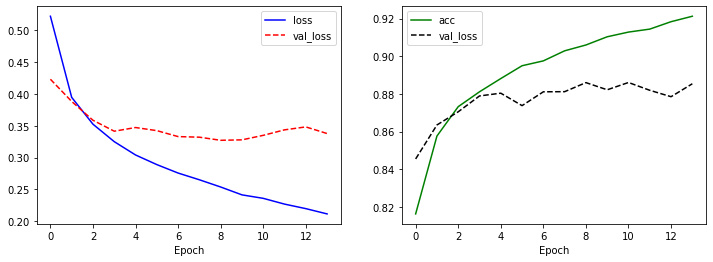

In [70]:
history_visualize(history)

최종 평가

- evaluuate(): 최종 정확도 및 손실값 확인

In [72]:
# model.evaluate(test_X, test_Y)

# loss: 0.3577055758237839, accuracy: 0.8834

예측

- predict(): 학습된 신경망을 활용하여 예측을 수행

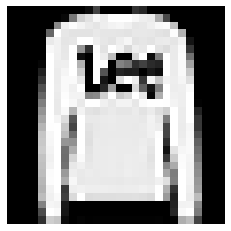

[[1.0000004 1.        1.9998902 1.        1.0000945 1.        1.0000149
  1.        1.        1.       ]]
예측 수행 범주:  2


In [45]:
# 예측 수행
pred = model.predict(test_X[[1]])

# 예측 이미지 확인
plt.imshow(test_X[1], cmap='gray')
plt.axis('off')
plt.show()

# 예측 결과 확인
# 결과를 보기 쉽게 하기 위해서 1을 더해줌
print(pred + 1)
print("예측 수행 범주: ", test_Y[1])


## 1.3 첫 번째 실험 - 합성곱 계층만 활용

- 실험 1. 합성곱 계층만 사용한 경우

- 실험 2. 풀링 계층과 정규화 기법인 드랍아웃을 함께 사용한 경우

- 실험 3. VGGNet 스타일 구축

- 실험 4. 이미지 보강

- 합성곱 연산을 진행하기 위한 4차원 (미니배치 데이터, 입력 이미지 행, 입력 이미지 열, 입력 채널 수)

- reshape(): 기존 3차원에서 채널이 추가된 4차원 형태로 차원변경


In [46]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [47]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [48]:
print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


분류 대상 이미지 및 범주 확인

- plt.subplot(4, 4, i+1): (행, 열, 순서)

- plt.imshow(train_X[i].reshape(28, 28), cmap='gray'): reshape(28, 28)을 통해 기존의 4차원에서 다시 2차원으로 변경하여 이미지 출력

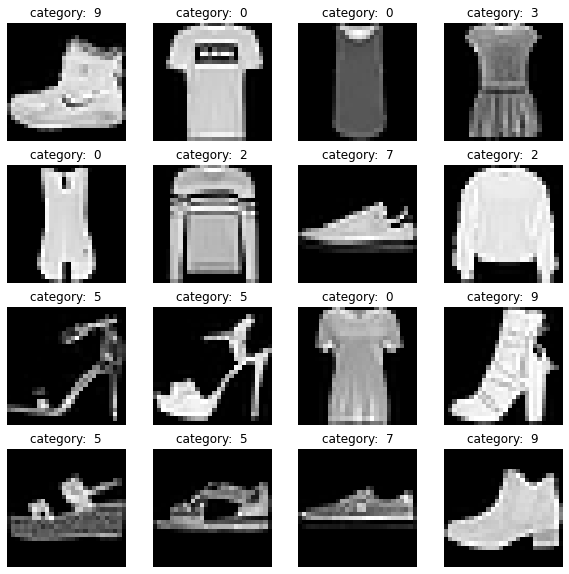

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [49]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 10))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(train_X[i].reshape(28, 28), cmap='gray')
    plt.title(f"category:  {train_Y[i]}")
    plt.axis('off')

plt.show()
print(train_Y[:16])

### 실험 1. 합성곱 계층만 사용

풀링 레이어 없이 단순 합성곱 계층만 활용

tf.keras.layers.Conv2D()

  - input_shape: 입력 이미지의 크기 및 채널

  - kernel_size: 커널 사이즈

  - filters: 몇 개의 필터를 생성할 것 인지(# 점차 증가하면서 쌓아야 한다.)

  - strides: 건너뛰기(기본값 (1, 1))

  - padding: 패딩 방식(기본값 'valid')

tf.keras.layers.Flatten(): 다차원 레이어를 1차원으로 펼쳐준다.

In [50]:
# 단순 합성곱 계층만 활용
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16, strides=(1, 1), padding='valid'),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

컴파일 단게

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

- '풀링 계층'이 없기 때문에 약 400만개의 파라미터가 생성됨(파라미터가 너무 많다)

신경망 학습 단게

In [53]:
hist = model.fit(train_X, train_Y,
                epochs=500,
                validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')])

Train on 45000 samples, validate on 15000 samples
Epoch 1/500
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.4705 - accuracy: 0.8314 - val_loss: 0.3812 - val_accuracy: 0.8619
Epoch 2/500
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.3430 - accuracy: 0.8774 - val_loss: 0.3668 - val_accuracy: 0.8666
Epoch 3/500
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.2836 - accuracy: 0.8954 - val_loss: 0.3724 - val_accuracy: 0.8664
Epoch 4/500
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.2465 - accuracy: 0.9086 - val_loss: 0.3856 - val_accuracy: 0.8697
Epoch 5/500
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.2139 - accuracy: 0.9205 - val_loss: 0.3939 - val_accuracy: 0.8719
Epoch 6/500
45000/45000 [==============================] - 84s 2ms/sample - loss: 0.1845 - accuracy: 0.9308 - val_loss: 0.4905 - val_accuracy: 0.8625
Epoch 7/500
45000/45000 [=========================

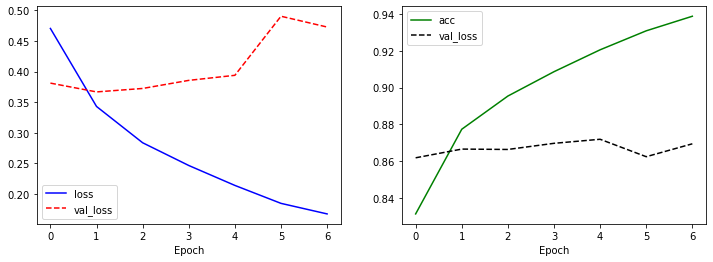

In [54]:
history_visualize(hist)

최종 평가

In [57]:
# model.evaluate(test_X, test_Y)

# loss: 0.506516281402111, accuracy: 0.8684

## 1.4 두 번째 실험 - 합성곱, 풀링, 드랍아웃 활용